# Marginal distributions

In this notebook we describe some methods of finding marginal distributions given joint distribution on a non-rectangular area.

In [1]:
# import plotting facilities
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Continuous distributions

Continuous distribution of a two-dimensional random vector $(X,Y)$ is described by a density function $f(x,y),\;(x,y)\in D$, where $D$ is a domain for $(X,Y)$, that is, $P((X,Y)\in D)=1$.

### Problem 1

Given a distribution with density function $f(x,y)=a(x+2y)$ in the triangle $D=\{x\geq0,\;y\geq0,\;x+y\leq1\}$, as shown in the figure below.

<img src='triang_domain.jpg'></img>

Find the constant $a$ and compute the margimal density functions $f_X(x),\;f_y(y),\;x,y\in[0,1]$.

### Solution

First note that $$ \int_D f(x,y)\,dx\,dy=1, $$ so we must have $$ a\int_0^1\left(\int_0^{1-x} (x+2y)\,dy\right)dx=a\int_0^1 \left(x(1-x)+(1-x)^2\right)\,dx=a\int_0^1(1-x)\,dx=a\,\frac12=1, $$ so $$ a=2. $$ Next, for the marginal density of $X$ we have $$ f_X(x)=\int_0^{1-x} f(x,y)\,dy=2\int_0^{1-x}(x+2y)\,dy=2(1-x),\;x\in[0,1]. $$ Similarly, $$ f_Y(y)=\int_0^{1-y} f(x,y)\,dx=2\int_0^{1-y}(x+2y)\,dx=(1-y)(1+3y),\;y\in[0,1]. $$

### Illustration

In [2]:
def marg_x(x):
    """ marginal density of X """
    return 2 * (1 - x)

def marg_y(y):
    """ marginal density of y """
    return (1 - y) * (1 + 3 * y)

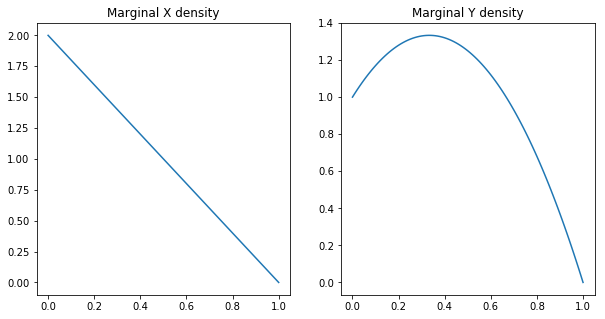

In [3]:
x = np.linspace(0, 1, 101)
y = np.linspace(0, 1, 101)
figsize(10, 5)
subplot(1, 2, 1)
plot(x, marg_x(x))
title('Marginal X density')
subplot(1, 2, 2)
plot(y, marg_y(y))
ti = title('Marginal Y density')